In [ ]:
import numpy as np
from scipy import stats

# Крок 0: Вхідні дані
# X: матриця факторів (n × k)
X = np.array([
    [1.59, 0.26, 2.05, 0.32, 0.14],
    [0.34, 0.28, 0.46, 0.59, 0.66],
    [2.53, 0.31, 2.46, 0.30, 0.31],
    [4.63, 0.40, 6.44, 0.43, 0.59],
    [2.16, 0.26, 2.16, 0.39, 0.16],
    [2.16, 0.30, 2.69, 0.32, 0.17],
    [0.68, 0.29, 0.73, 0.42, 0.23],
    [0.35, 0.26, 0.42, 0.21, 0.08],
    [0.52, 0.24, 0.49, 0.20, 0.08],
    [3.42, 0.31, 3.02, 1.37, 0.73],
    [1.78, 0.30, 3.19, 0.73, 0.17],
    [2.40, 0.32, 3.30, 0.25, 0.14],
    [9.36, 0.40,11.51, 0.39, 0.38],
    [1.72, 0.28, 2.26, 0.82, 0.17],
    [0.59, 0.29, 0.60, 0.13, 0.35],
    [0.28, 0.26, 0.30, 0.09, 0.15],
    [1.64, 0.29, 1.44, 0.20, 0.08],
    [0.09, 0.22, 0.05, 0.43, 0.20],
    [0.08, 0.25, 0.03, 0.73, 0.20],
    [1.36, 0.26, 0.17, 0.99, 0.42]
])
# Y: вектор відгуку
Y = np.array([ 9.7,  8.4,  9.0,  9.9,  9.6,
               8.6, 12.5,  7.6,  6.9, 13.5,
               9.7, 10.7, 12.1,  9.7,  7.0,
               7.2,  8.2,  8.4, 13.1,  8.7 ])

n, k = X.shape
alpha = 0.05

# Крок 1: Стандартизація даних (Z)
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=1)
Z = (X - means) / stds

# Крок 2: Кореляційна матриця R
R = (Z.T @ Z) / (n - 1)

# Крок 3 & 4: Власний розклад R
eigvals, eigvecs = np.linalg.eig(R)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Крок 5: Факторні навантаження A = U * sqrt(λ)
loadings = eigvecs * np.sqrt(eigvals)

# Крок 6: Частка поясненої дисперсії
total_var = eigvals.sum()
perc_var = eigvals / total_var * 100
cum_perc = np.cumsum(perc_var)

# Крок 7: Регресія Y на головні компоненти
F = Z @ eigvecs
X_design = np.hstack([np.ones((n,1)), F])
beta_hat = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y
Y_pred = X_design @ beta_hat

# Статистичні показники регресії
Y_mean = Y.mean()
SSR = np.sum((Y_pred - Y_mean)**2)
SSE = np.sum((Y - Y_pred)**2)
SST = np.sum((Y - Y_mean)**2)
R2 = SSR / SST
p = k
df_model = p
df_resid = n - p - 1
MSR = SSR / df_model
MSE = SSE / df_resid
F_stat = MSR / MSE
F_crit = stats.f.ppf(1 - alpha, df_model, df_resid)

cov_beta = MSE * np.linalg.inv(X_design.T @ X_design)
se_beta = np.sqrt(np.diag(cov_beta))
t_stats = beta_hat / se_beta
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df_resid))

# === Вивід результатів ===
print("=== Крок 1: Стандартизовані дані Z ===")
print(Z)

print("\n=== Крок 2: Кореляційна матриця R ===")
print(R)

print("\n=== Крок 3: Власні значення (λ) ===")
print(eigvals)

print("\n=== Крок 4: Власні вектори (U) ===")
print(eigvecs)

print("\n=== Крок 5: Факторні навантаження (A) ===")
print(loadings)

print("\n=== Крок 6: Частка дисперсії (% та накопичена) ===")
for i, (pv, cp) in enumerate(zip(perc_var, cum_perc), 1):
    print(f"ГК{i}: {pv:.2f}% , Накопичено: {cp:.2f}%")
print("\nВиберіть компоненти, де накопичена дисперсія перевищує 60-70%.\n")

print("=== Крок 7: Регресія Y на головні компоненти ===")
print(f"Коефіцієнти (інтерцепт та ГК): {beta_hat}")
print(f"R² = {R2:.4f}")
print(f"F-статистика = {F_stat:.4f}, Критичне F (α={alpha}) = {F_crit:.4f}")

print("\nЗначущість коефіцієнтів:")
for j, (b, se, t, pval) in enumerate(zip(beta_hat, se_beta, t_stats, p_values)):
    name = 'Інтерцепт' if j==0 else f'ГК{j}'
    print(f" {name}: b={b:.4f}, SE={se:.4f}, t={t:.4f}, p={pval:.4f}")

=== Крок 1: Стандартизовані дані Z ===
[[-0.13830861 -0.63378566 -0.05114515 -0.45228841 -0.67098838]
 [-0.72635544 -0.1966921  -0.63829889  0.38700967  2.0026818 ]
 [ 0.3039026   0.45894824  0.10025927 -0.51445864  0.2030961 ]
 [ 1.29182126  2.42586925  1.56999002 -0.11035215  1.64276466]
 [ 0.12984074 -0.63378566 -0.01052445 -0.23469261 -0.56815491]
 [ 0.12984074  0.24040146  0.18519346 -0.45228841 -0.51673818]
 [-0.5664067   0.02185468 -0.53859354 -0.14143727 -0.20823777]
 [-0.72165106 -0.63378566 -0.65307006 -0.79422466 -0.97948879]
 [-0.64167669 -1.07087922 -0.62722052 -0.82530977 -0.97948879]
 [ 0.72259194  0.45894824  0.30705556  2.81164855  2.36259894]
 [-0.0489255   0.24040146  0.369833    0.82220126 -0.51673818]
 [ 0.24274573  0.67749502  0.4104537  -0.6698842  -0.67098838]
 [ 3.51699044  2.42586925  3.44223497 -0.23469261  0.56301324]
 [-0.07715174 -0.1966921   0.02640345  1.10196729 -0.51673818]
 [-0.60874607  0.02185468 -0.58659982 -1.04290557  0.40876304]
 [-0.75458168 -0

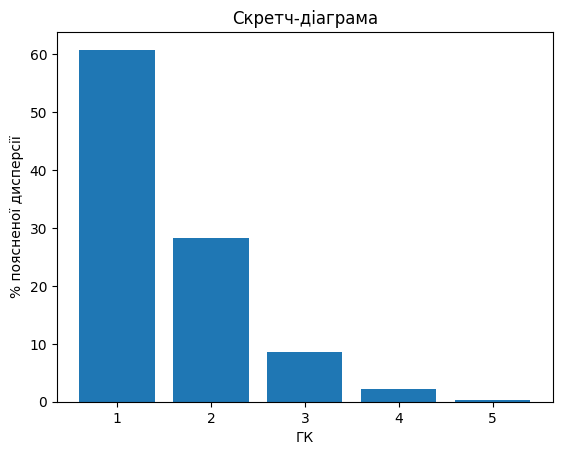

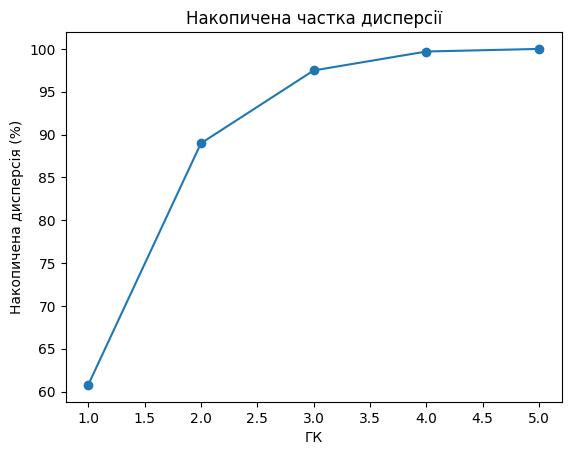

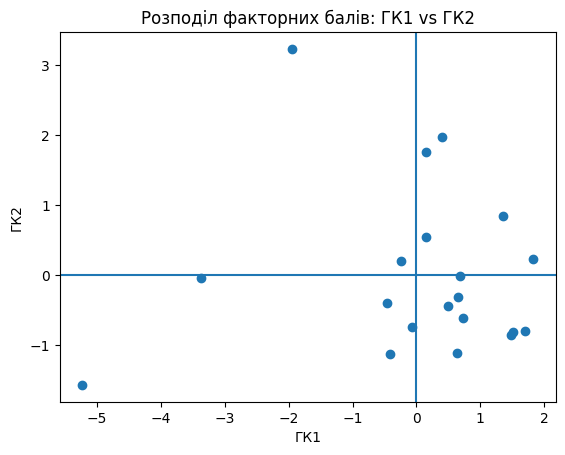

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Повторимо розрахунки для отримання змінних
X = np.array([
    [1.59, 0.26, 2.05, 0.32, 0.14],
    [0.34, 0.28, 0.46, 0.59, 0.66],
    [2.53, 0.31, 2.46, 0.30, 0.31],
    [4.63, 0.40, 6.44, 0.43, 0.59],
    [2.16, 0.26, 2.16, 0.39, 0.16],
    [2.16, 0.30, 2.69, 0.32, 0.17],
    [0.68, 0.29, 0.73, 0.42, 0.23],
    [0.35, 0.26, 0.42, 0.21, 0.08],
    [0.52, 0.24, 0.49, 0.20, 0.08],
    [3.42, 0.31, 3.02, 1.37, 0.73],
    [1.78, 0.30, 3.19, 0.73, 0.17],
    [2.40, 0.32, 3.30, 0.25, 0.14],
    [9.36, 0.40,11.51, 0.39, 0.38],
    [1.72, 0.28, 2.26, 0.82, 0.17],
    [0.59, 0.29, 0.60, 0.13, 0.35],
    [0.28, 0.26, 0.30, 0.09, 0.15],
    [1.64, 0.29, 1.44, 0.20, 0.08],
    [0.09, 0.22, 0.05, 0.43, 0.20],
    [0.08, 0.25, 0.03, 0.73, 0.20],
    [1.36, 0.26, 0.17, 0.99, 0.42]
])
Y = np.array([9.7, 8.4, 9.0, 9.9, 9.6, 8.6, 12.5, 7.6, 6.9, 13.5,
              9.7, 10.7, 12.1, 9.7, 7.0, 7.2, 8.2, 8.4, 13.1, 8.7])

n, k = X.shape

# Стандартизація
Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

# Власний розклад
R = (Z.T @ Z) / (n - 1)
eigvals, eigvecs = np.linalg.eig(R)
idx = np.argsort(eigvals)[::-1]
eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

# Частки дисперсії
perc_var = eigvals / eigvals.sum() * 100
cum_perc = np.cumsum(perc_var)

# Факторні бали
F = Z @ eigvecs

# Графік 1: Скретч-діаграма
plt.figure()
plt.bar(range(1, k+1), perc_var)
plt.xlabel('ГК')
plt.ylabel('% поясненої дисперсії')
plt.title('Скретч-діаграма')
plt.show()

# Графік 2: Накопичена дисперсія
plt.figure()
plt.plot(range(1, k+1), cum_perc, marker='o')
plt.xlabel('ГК')
plt.ylabel('Накопичена дисперсія (%)')
plt.title('Накопичена частка дисперсії')
plt.show()

# Графік 3: Розсіяння факторних балів (ГК1 vs ГК2)
plt.figure()
plt.scatter(F[:, 0], F[:, 1])
plt.axhline(0)
plt.axvline(0)
plt.xlabel('ГК1')
plt.ylabel('ГК2')
plt.title('Розподіл факторних балів: ГК1 vs ГК2')
plt.show()